Reference:  https://stackoverflow.com/questions/48122019/how-can-i-plot-identity-lines-on-a-seaborn-pairplot  

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [39]:
pd.set_option('display.max_columns', None)
# file = './Smoothing/smoothing_samples01_02_rmse.csv'
# file = './Smoothing/smoothing_alt.csv'
# file = './Smoothing/smoothing_01_02_0818.csv'
file = './Smoothing/sobel_01_02_base.csv'
data = pd.read_csv(file)
data

,OID_,Field1,Unnamed__0,OBJECTID__,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,HWM_ELEV_f,HWM_ELEV_m,DEM_m,HAND_m,Inun_Depth_m,Stream_H_m,COMID,StreamOrde,fmax,time_file,Predict_Stream_H_m,roughness,RMSE,smooth_3,smooth_2,smooth_4,smooth_5,smooth_6,smooth_all,sobel02,sobel01,maxflow0818,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,172,172,209,38,1,NBRA1,NBRA1_1,40.636139,-74.681000,88.8425,27.079194,25.212740,1.430681,1.866454,3.297135,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.843560,1.872436,1.837211,1.824617,2.039222,1.843467,1.842760,NaN,1.842760,NaN,1.842760,True
1,2,173,173,210,38,2,NBRA1,NBRA1_2,40.635861,-74.681389,88.7525,27.051762,26.335970,2.554041,0.715792,3.269833,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,0.002581,0.002333,0.017093,0.010945,0.081126,0.005970,0.000000,NaN,NaN,NaN,0.719400,False
2,3,174,174,211,38,3,NBRA1,NBRA1_3,40.636389,-74.681833,89.1925,27.185874,25.109610,1.390253,2.076264,3.466517,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.715728,1.742704,1.718336,1.704824,1.900538,1.715297,1.714660,NaN,1.714660,NaN,1.883188,False
3,4,175,175,212,38,4,NBRA1,NBRA1_4,40.636528,-74.681972,89.0225,27.134058,25.008680,1.341898,2.125378,3.467276,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.931637,1.936076,1.921774,1.829705,2.107028,1.932440,1.931543,NaN,1.931543,NaN,1.931543,True
4,5,176,176,213,38,5,NBRA1,NBRA1_5,40.635972,-74.681861,88.0175,26.827734,26.751300,3.034917,0.076434,3.111351,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,0.238589,0.238651,0.234894,0.316540,0.368532,0.237868,0.238524,NaN,0.238523,NaN,0.238524,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,951,951,27,60,,Somerset,,40.549746,-74.586101,47.6254,14.516222,13.925290,6.369551,0.590932,6.960483,9513382,5,1593.829964,20110828_18,6.338650,0.006644,0.629992,0.026031,0.001976,0.058584,0.001307,0.020789,0.002570,0.000000,0.000000,NaN,NaN,-0.030901,True
122,123,952,952,56,107,,Somerset,,40.560537,-74.527339,36.3069,11.066343,8.906622,5.057386,2.159721,7.217107,9514000,6,2586.619942,20110828_20,6.886389,0.005000,1.443823,1.758932,1.778503,1.815625,1.860088,1.828880,1.830299,1.829003,1.829003,1.829003,NaN,1.829003,True
123,124,953,953,63,115,,Somerset,,40.568142,-74.553190,52.6148,16.036991,17.000590,9.578168,-0.963599,8.614569,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000,0.000000,NaN,NaN,-5.590913,False
124,125,954,954,62,114,,Somerset,,40.568788,-74.553292,53.0096,16.157326,16.397320,9.169795,-0.239994,8.929801,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000,0.000000,NaN,NaN,-5.182540,False


In [29]:
#create rmse data and save to a file if you haven't already - use 
if False:
    for column in data.columns:
        check_str = column
        if column.find('smooth') == 0:
            name = column + '_rmse'
            data[name] = ''

    for column in data.columns:
        check_str = column
        if (column.find('smooth') == 0) and column.find('rmse') == -1:
            name = column + '_rmse'
            for catch in data.COMID.unique():
                subset = data.loc[data['COMID'] == catch]
                rmse = ((subset['Inun_Depth_m'] - subset[column]) ** 2).mean() ** .5
                data[name].loc[data['COMID'] == catch] = rmse
    data.to_csv(file[:-4] + '_rmse.csv')

In [50]:
# data

In [51]:
# data.columns

In [40]:
data['Predict_Inun_Depth_m'] = ''
data['Predict_Inun_Depth_m'] = data['maxflow0818'] - data['HAND_m']
data

,OID_,Field1,Unnamed__0,OBJECTID__,SITE_NUM,HWM_ID,SITE_ID,NAME,LAT_DD,LON_DD,HWM_ELEV_f,HWM_ELEV_m,DEM_m,HAND_m,Inun_Depth_m,Stream_H_m,COMID,StreamOrde,fmax,time_file,Predict_Stream_H_m,roughness,RMSE,smooth_3,smooth_2,smooth_4,smooth_5,smooth_6,smooth_all,sobel02,sobel01,maxflow0818,Unnamed: 32,Unnamed: 33,Unnamed: 34,Predict_Inun_Depth_m
0,1,172,172,209,38,1,NBRA1,NBRA1_1,40.636139,-74.681000,88.8425,27.079194,25.212740,1.430681,1.866454,3.297135,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.843560,1.872436,1.837211,1.824617,2.039222,1.843467,1.842760,NaN,1.842760,NaN,1.842760,True,0.412079
1,2,173,173,210,38,2,NBRA1,NBRA1_2,40.635861,-74.681389,88.7525,27.051762,26.335970,2.554041,0.715792,3.269833,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,0.002581,0.002333,0.017093,0.010945,0.081126,0.005970,0.000000,NaN,NaN,NaN,0.719400,False,NaN
2,3,174,174,211,38,3,NBRA1,NBRA1_3,40.636389,-74.681833,89.1925,27.185874,25.109610,1.390253,2.076264,3.466517,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.715728,1.742704,1.718336,1.704824,1.900538,1.715297,1.714660,NaN,1.714660,NaN,1.883188,False,0.324407
3,4,175,175,212,38,4,NBRA1,NBRA1_4,40.636528,-74.681972,89.0225,27.134058,25.008680,1.341898,2.125378,3.467276,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,1.931637,1.936076,1.921774,1.829705,2.107028,1.932440,1.931543,NaN,1.931543,NaN,1.931543,True,0.589645
4,5,176,176,213,38,5,NBRA1,NBRA1_5,40.635972,-74.681861,88.0175,26.827734,26.751300,3.034917,0.076434,3.111351,9513008,3,344.079992,20110828_13,3.273441,0.058429,0.123235,0.238589,0.238651,0.234894,0.316540,0.368532,0.237868,0.238524,NaN,0.238523,NaN,0.238524,True,-2.796394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,951,951,27,60,,Somerset,,40.549746,-74.586101,47.6254,14.516222,13.925290,6.369551,0.590932,6.960483,9513382,5,1593.829964,20110828_18,6.338650,0.006644,0.629992,0.026031,0.001976,0.058584,0.001307,0.020789,0.002570,0.000000,0.000000,NaN,NaN,-0.030901,True,NaN
122,123,952,952,56,107,,Somerset,,40.560537,-74.527339,36.3069,11.066343,8.906622,5.057386,2.159721,7.217107,9514000,6,2586.619942,20110828_20,6.886389,0.005000,1.443823,1.758932,1.778503,1.815625,1.860088,1.828880,1.830299,1.829003,1.829003,1.829003,NaN,1.829003,True,-3.228383
123,124,953,953,63,115,,Somerset,,40.568142,-74.553190,52.6148,16.036991,17.000590,9.578168,-0.963599,8.614569,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000,0.000000,NaN,NaN,-5.590913,False,NaN
124,125,954,954,62,114,,Somerset,,40.568788,-74.553292,53.0096,16.157326,16.397320,9.169795,-0.239994,8.929801,9513850,3,127.239997,20110828_06,3.987255,0.300000,2.502124,0.003321,0.001256,0.005630,0.001284,0.001054,0.001386,0.000000,0.000000,NaN,NaN,-5.182540,False,NaN


In [41]:
r2 = r2_score(data['Inun_Depth_m'], data['Inun_Depth_m'])
mse = mean_squared_error(data['Inun_Depth_m'], data['Inun_Depth_m'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = 1.0   MSE = 0.0


In [42]:
r2 = r2_score(data['Inun_Depth_m'], data['Predict_Inun_Depth_m'])
mse = mean_squared_error(data['Inun_Depth_m'], data['Predict_Inun_Depth_m'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
data2 = data.copy()
data = data.dropna()
r2 = r2_score(data['Inun_Depth_m'], data['sobel01'])
mse = mean_squared_error(data['Inun_Depth_m'], data['sobel01'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = -0.05498   MSE = 2.51963


In [34]:
data = data2
r2 = r2_score(data['Inun_Depth_m'], data['sobel02'])
mse = mean_squared_error(data['Inun_Depth_m'], data['sobel02'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = -0.00574   MSE = 2.38704


In [7]:
subset1 = data[['Inun_Depth_m', 'Predict_Inun_Depth_m', 'smooth1_1', 'smooth1_2', 'smooth1_3', \
                'smooth1_5', 'smooth1_6', 'smooth1_all']].copy()
subset1 = subset1.dropna()
# subset1

In [8]:
for name in ['Predict_Inun_Depth_m', 'smooth1_1', 'smooth1_2', 'smooth1_3', 'smooth1_5', 'smooth1_6', 'smooth1_all']:
    score = r2_score( subset1['Inun_Depth_m'], subset1[name])
    mse = mean_squared_error( subset1['Inun_Depth_m'], subset1[name])
    print(f'{name} R² = {round(score,5)}   MSE = {round(mse,5)}')

Predict_Inun_Depth_m R² = -0.06232   MSE = 2.52875
smooth1_1 R² = 0.00511   MSE = 2.36824
smooth1_2 R² = 0.45285   MSE = 1.30244
smooth1_3 R² = 0.27421   MSE = 1.72768
smooth1_5 R² = 0.30983   MSE = 1.64288
smooth1_6 R² = 0.30642   MSE = 1.651
smooth1_all R² = 0.28223   MSE = 1.70859


In [9]:
r2 = r2_score(subset1['Inun_Depth_m'], subset1['smooth1_1'])
mse = mean_squared_error(subset1['Inun_Depth_m'], subset1['smooth1_1'])
print(f'R² = {round(r2,5)}   MSE = {round(mse,5)}')

R² = 0.00511   MSE = 2.36824


In [10]:
subset2 = data[['Inun_Depth_m', 'Predict_Inun_Depth_m', 'smooth2_1', 'smooth2_2', 'smooth2_3', 'smooth2_4',\
                'smooth2_5', 'smooth2_6', 'smooth2_all']].copy()
# subset2 = subset2.loc[subset2.Inun_Depth_m > -4]

In [11]:
for name in ['Predict_Inun_Depth_m', 'smooth2_1', 'smooth2_2', 'smooth2_3', 'smooth2_4', 'smooth2_5', 'smooth2_6', 'smooth2_all']:
    score = r2_score(subset2['Inun_Depth_m'], subset2[name])
    mse = mean_squared_error( subset2['Inun_Depth_m'], subset2[name])
    print(f'{name} R² = {round(score,5)}   MSE = {round(mse,5)}')

Predict_Inun_Depth_m R² = 0.16455   MSE = 1.98418
smooth2_1 R² = 0.42404   MSE = 1.3679
smooth2_2 R² = 0.4952   MSE = 1.1989
smooth2_3 R² = 0.39913   MSE = 1.42706
smooth2_4 R² = 0.42773   MSE = 1.35913
smooth2_5 R² = 0.45687   MSE = 1.28992
smooth2_6 R² = 0.33708   MSE = 1.57443
smooth2_all R² = 0.4248   MSE = 1.36609


In [12]:
def plot_unity(xdata, ydata, **kwargs):
#     mn = ydata.min()
    mn = min(xdata.min(), ydata.min())  
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [13]:
data.index.size

167

In [14]:
subset1.index.size

116

In [15]:
subset2.index.size

166

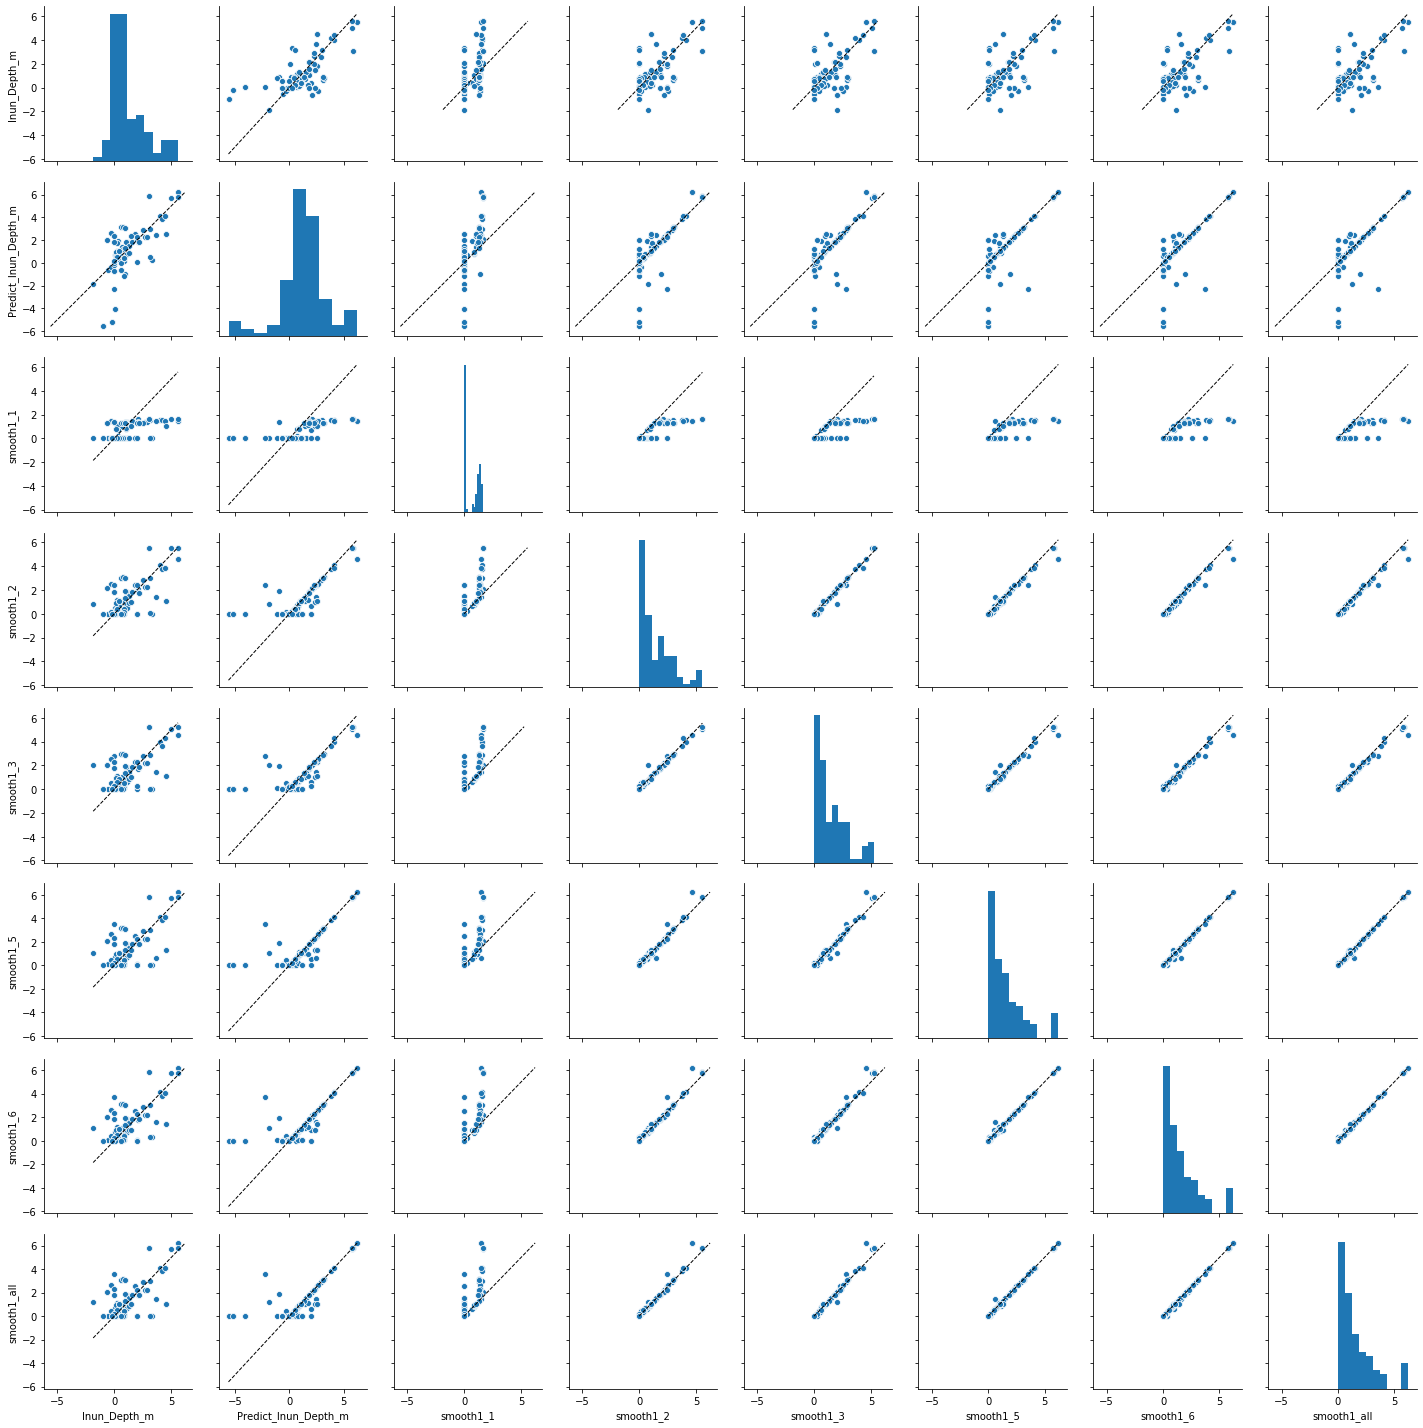

In [16]:
# sns.pairplot(subset1)
grid = sns.pairplot(subset1)
grid.map_offdiag(plot_unity)

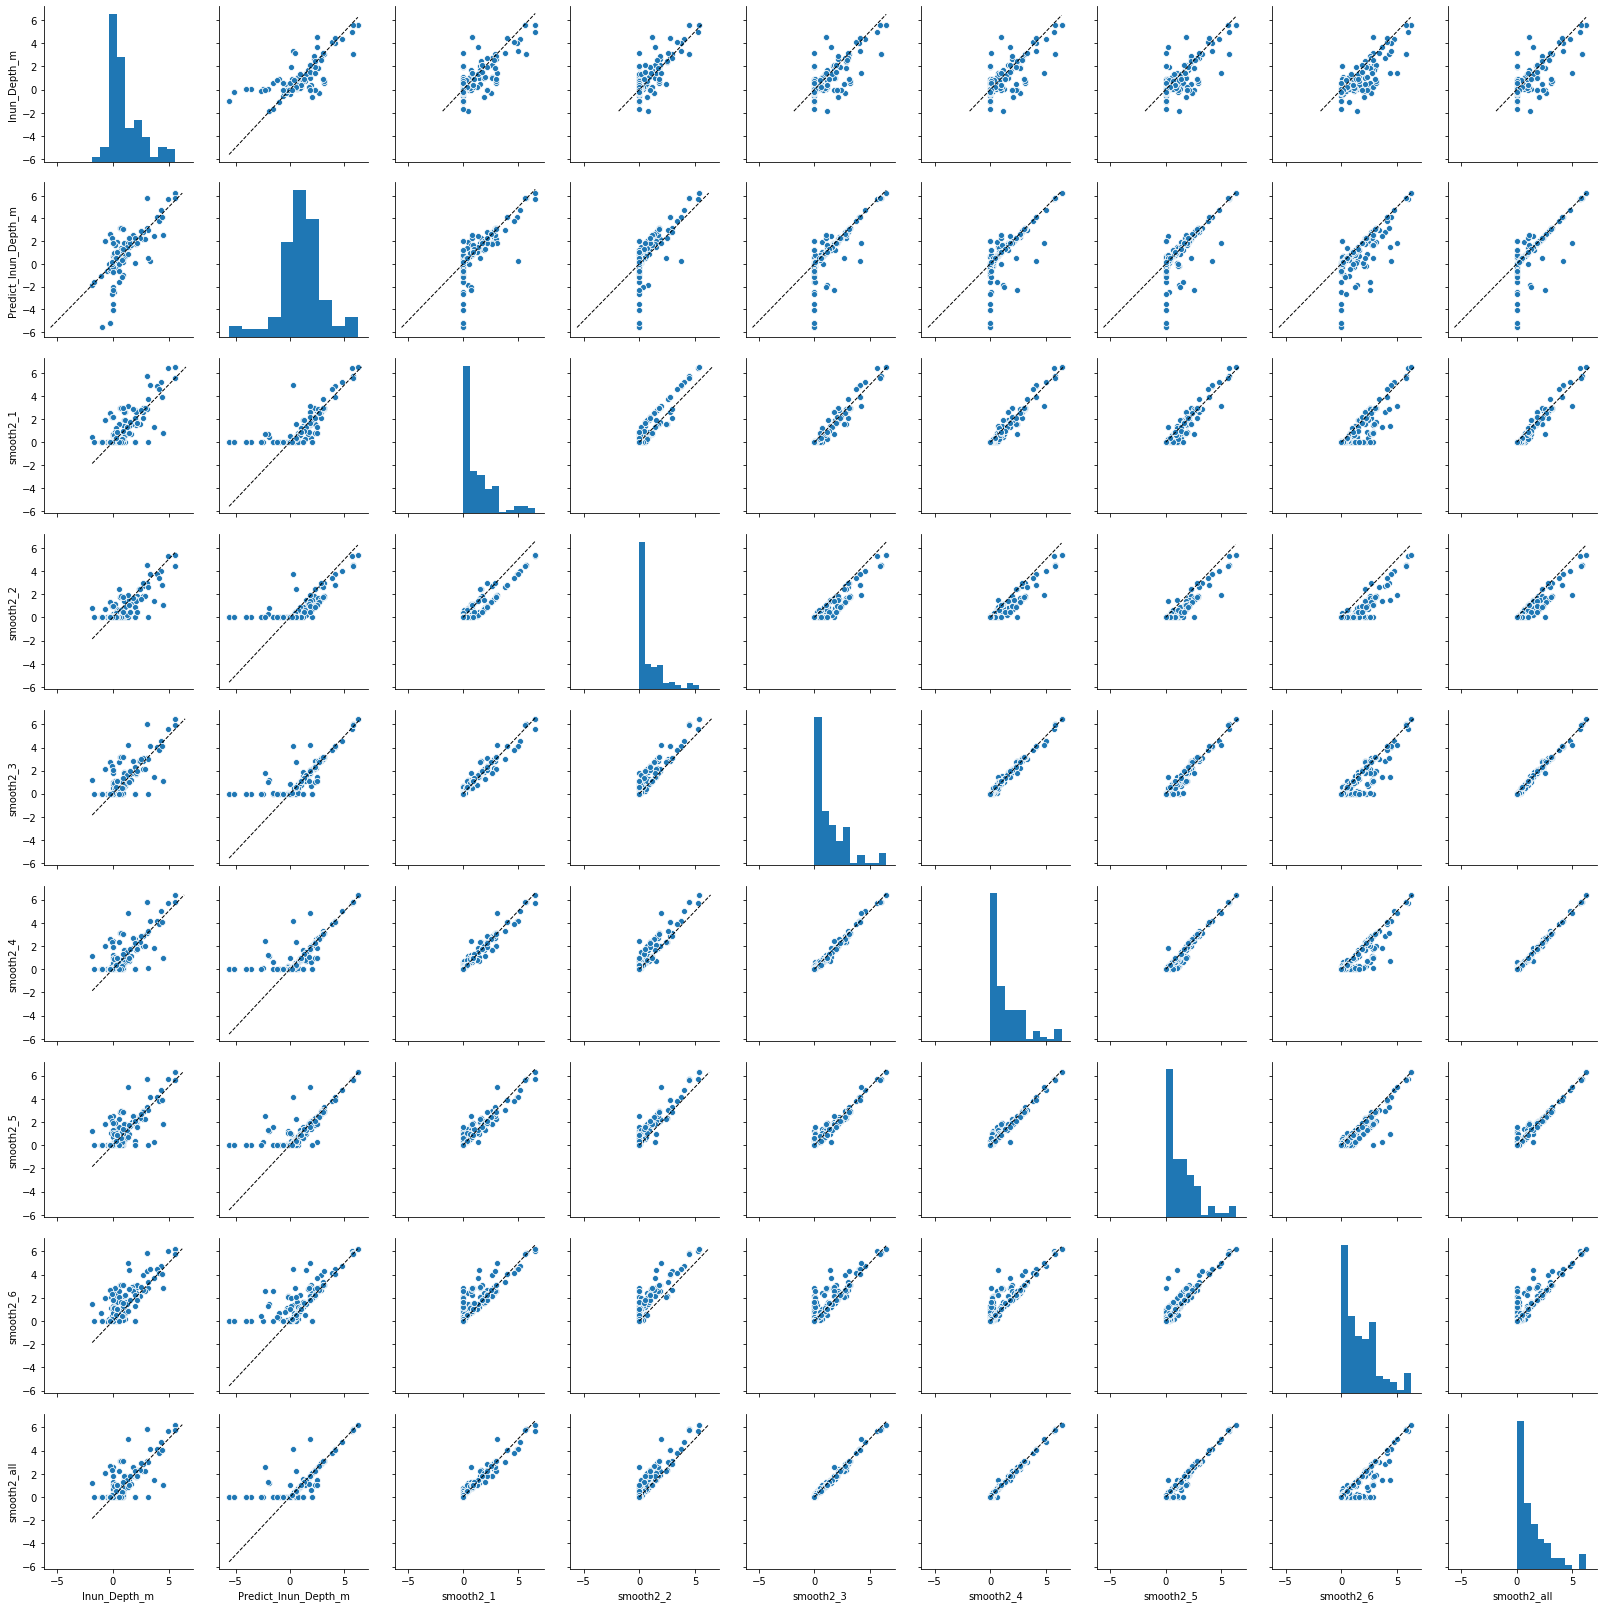

In [17]:
grid = sns.pairplot(subset2)
grid.map_offdiag(plot_unity)

In [18]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

# matplotlib.rc('axes', labelsize=20) 
# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20) 

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)

# # fig, ax = plt.subplots()
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==1], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==1],label='Order 1',c='red')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==2], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==2],label='Order 2',c='orange')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==3], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==3],label='Order 3',c='yellow')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==4], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==4],label='Order 4',c='green')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==5], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==5],label='Order 5',c='blue')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==6], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==6],label='Order 6',c='purple')
# ax.legend()
# lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
# plt.xlabel("Measured_Stream_H_m")
# plt.ylabel("Predict_Stream_H_m")
# plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


In [19]:
# import matplotlib
# import matplotlib.pyplot as plt

# matplotlib.rc('axes', labelsize=20) 
# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20) 

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)

# # fig, ax = plt.subplots()
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==1], y=data['RASTERVALU'].loc[data.StreamOrde==1],label='Order 1',c='red')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==2], y=data['RASTERVALU'].loc[data.StreamOrde==2],label='Order 2',c='orange')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==3], y=data['RASTERVALU'].loc[data.StreamOrde==3],label='Order 3',c='yellow')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==4], y=data['RASTERVALU'].loc[data.StreamOrde==4],label='Order 4',c='green')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==5], y=data['RASTERVALU'].loc[data.StreamOrde==5],label='Order 5',c='blue')
# ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==6], y=data['RASTERVALU'].loc[data.StreamOrde==6],label='Order 6',c='purple')
# ax.legend()
# lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# # now plot both limits against eachother
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)
# plt.xlabel("Measured_Stream_H_m")
# plt.ylabel("Smoothed_Stream_H_m")
# plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')
